In [1]:
import torch
import torchvision
from torchvision.utils import save_image, make_grid
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import os
from os.path import join
import random
from tqdm import tqdm, trange
import numpy as np 
import torch 
import torchvision
from torchvision.utils import save_image, make_grid
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
data_dir = '/n/home12/binxuwang/Github/DiffusionReasoning/'

/n/home12/binxuwang/.conda/envs/torch/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [2]:
offset = 0
pos_list = [[x + offset, y + offset] for x in [0, 40, 80] for y in [0, 40, 80]]
d_PGM = torch.load(join(data_dir,'PGM_shape_size_color_normalized.pt')) # torch.Size([7, 10, 10, 40, 40])

def load_PGM_inputs(attr): 
    """attr: (3, 9, 3), (num_panel, num_pos, num_attr)"""
    inputs = -0.6891*torch.ones((3, 120 + 2*offset, 120 + 2*offset))
    for i_panel in range(3): 
        for i_pos in range(9): 
            if attr[i_panel, i_pos, 0] != -1: 
                i_shape, i_size, i_color = attr[i_panel, i_pos]
                x0, y0 = pos_list[i_pos]
                inputs[i_panel, x0:(x0+40), y0:(y0+40)] = d_PGM[int(i_shape), int(i_size), int(i_color)]
    return inputs 

class dataset_PGM_single(Dataset): 
    def __init__(self, attr_list): 
        """attr_list: [num_samples, 3, 9, 3]"""
        self.attr_list = attr_list  
        
    def __len__(self): 
        return len(self.attr_list)
    
    def __getitem__(self, idx): 
        """attr: [3, 9, 3]"""
        attr = self.attr_list[idx] 
        inputs = load_PGM_inputs(attr)
        return inputs, idx

In [4]:
attr_all = np.load(data_dir+'attr_all.npy')
print(attr_all.shape)

(40, 12000, 3, 9, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


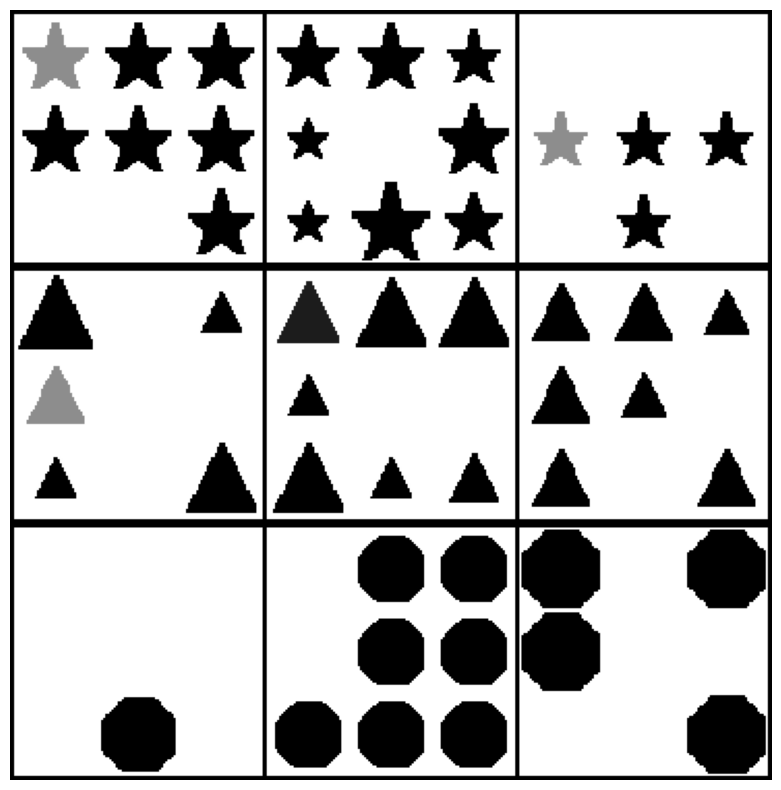

In [14]:
rule_class = 0
# idxs = (0,3,5)
# idxs = np.random.choice(np.where(attr_all[rule_class][:,0,0] != -1)[0], 3)
idxs = np.random.randint(0, len(attr_all[rule_class]), 3)
dataset_class0 = dataset_PGM_single(attr_all[rule_class]) 
mtg1 = make_grid(dataset_class0[idxs[0]][0][:,None] / -0.6891, nrow=3, padding=2, pad_value=0)
mtg2 = make_grid(dataset_class0[idxs[1]][0][:,None] / -0.6891, nrow=3, padding=2, pad_value=0)
mtg3 = make_grid(dataset_class0[idxs[2]][0][:,None] / -0.6891, nrow=3, padding=2, pad_value=0)
plt.figure(figsize=(10,10))
plt.imshow(torch.cat([mtg1, mtg2, mtg3], dim=1).permute(1,2,0))
# plt.imshow(torchvision.transforms.Resize((192, 192))(
#            torch.cat([mtg1, mtg2, mtg3], dim=1),).permute(1,2,0))
plt.axis('off')
plt.show()